In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import scienceplots

plt.style.use("science")

In [2]:
import pandas as pd
df = pd.read_csv("./stopping_powers.csv", delimiter=" ", index_col=False).iloc[::-1]

df = df.append(
    {"Energy":0, "StoppingPower":0}, ignore_index=True
)

proton_df = pd.read_csv("./proton_stopping_power.csv", delimiter=" ", index_col=False).iloc[::-1]
proton_df = proton_df.append(
    {"Energy":0, "StoppingPower":0}, ignore_index=True
)

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_60534/3238799845.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_60534/3238799845.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  proton_df = proton_df.append(


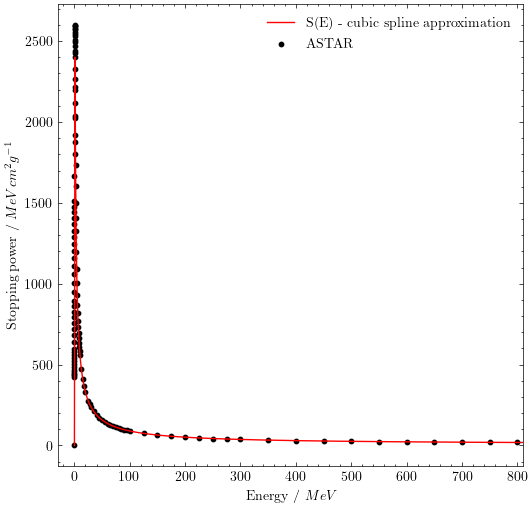

In [99]:
f = interp1d(df["Energy"], df["StoppingPower"], kind="cubic", bounds_error=False, fill_value=0)

plt.figure(figsize=(6,6))
plt.plot(
    range(0, 1000, 1),
    [f(E) for E in range(0, 1000, 1)],
    color="red",
    label="S(E) - cubic spline approximation"
)
plt.scatter(
    df["Energy"], df["StoppingPower"], marker="o", color="black", s=10, label="ASTAR"
)
plt.ylabel(r"Stopping power / $MeV cm^2  g^{-1}$")
plt.xlabel(r"Energy / $MeV$")
plt.legend()

plt.xlim(-30, 810)
plt.savefig("./stopping_power.png", dpi=300)

In [107]:
f = interp1d(df["Energy"], df["StoppingPower"], kind="cubic", bounds_error=False, fill_value=0)

def S(E):
    return -0.92*f(E)

dose = []
E0 = 800
step_size = 0.0001
num_steps = 1000000

p = 0.92

def euler_method(E0, step_size, num_steps):
    energy = E0
    dose = []

    for _ in range(num_steps):
        delta = S(energy)
        energy += step_size*delta
        dose.append(energy)

    return dose

dose_result = euler_method(E0, step_size, num_steps)

Text(0, 0.5, 'Relative dose')

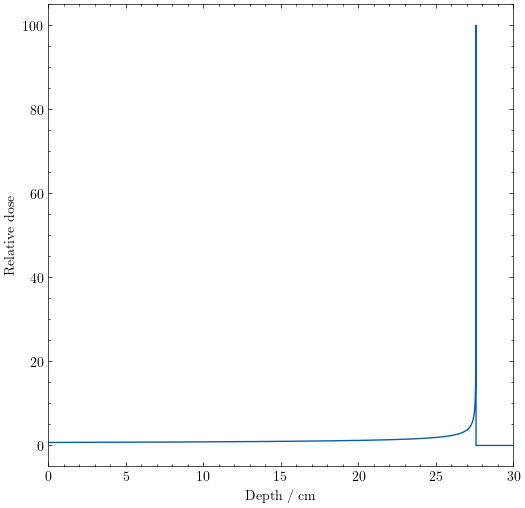

In [108]:
delta_E = -np.diff(dose_result)
plt.figure(figsize=(6,6))

plt.plot(
    step_size* np.arange(0, num_steps - 1),
    100*delta_E/np.max(delta_E)
)

plt.xlim(0, 30)
plt.xlabel("Depth / cm")
plt.ylabel("Relative dose")

#plt.savefig("./dose_depth.png", dpi=300)

In [16]:
# Peak maximum
step_size*np.argmax(np.diff(dose_result))

27.5847

In [110]:
# Entrance dose
-np.diff(dose_result)[0]/(np.max(-np.diff(dose_result)))

0.00713590429316275

Question b

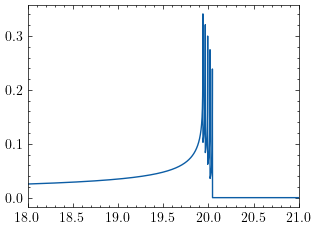

In [21]:
# Q2)
beams = None
doses = []

step_size = 1e-4
num_steps = 1000000

for E0 in np.linspace(663, 665, 5):
    temp = euler_method(E0, step_size, num_steps)
    doses.append(temp)
    if beams is None:
        beams = np.array(temp)
    else:
        beams += np.array(temp)
    
    del temp
    
plt.plot(
    step_size* np.arange(0, num_steps - 1),
    -np.diff(beams)
)

plt.xlim(18, 21)
plt.show()

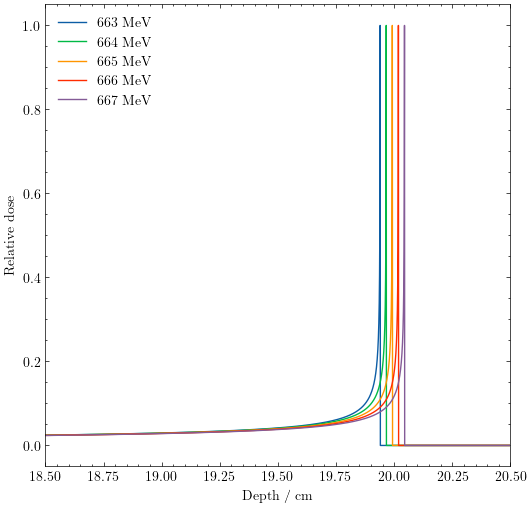

In [101]:
plt.figure(figsize=(6,6))
for i, dose in enumerate(doses):
    plt.plot(
        step_size* np.arange(0, num_steps - 1),
        -np.diff(dose)/np.max(-np.diff(dose)),
        label=f"{663 + i} MeV"
    )
plt.xlim(18.5,20.5)
plt.legend()
plt.xlabel("Depth / cm")
plt.ylabel("Relative dose")
plt.savefig("./beam_energies.png", dpi=300)

In [45]:
# 0.34, 0.32, 0.3, 0.28, 0.24
0.34/0.34, 0.32/0.34, 0.3/0.34, 0.28/0.34, 0.24/0.34

(1.0,
 0.9411764705882353,
 0.8823529411764705,
 0.823529411764706,
 0.7058823529411764)

In [55]:
1/0.9411764705882353

1.0625

In [71]:
1.0 / 0.8823529411764705

1.1333333333333335

In [72]:
1 / 0.823529411764706

1.2142857142857142

In [73]:
1 / 0.7058823529411764

1.4166666666666667

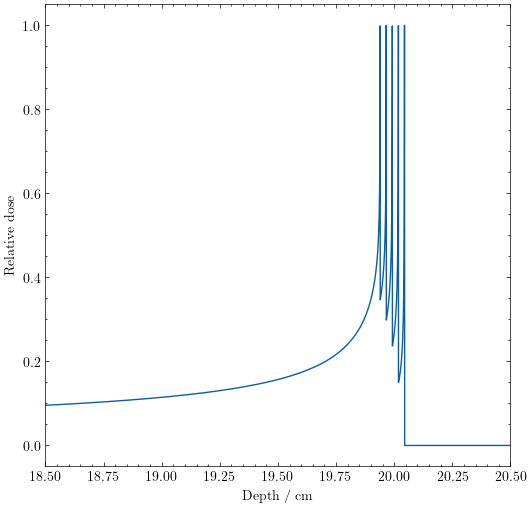

In [102]:
beams_norm = np.array(doses[0]) + 1.08*np.array(doses[1]) + 1.17*np.array(doses[2]) + 1.30*np.array(doses[3]) + 1.53*np.array(doses[4])
plt.figure(figsize=(6,6))
plt.plot(
    step_size* np.arange(0, num_steps - 1),
    -np.diff(beams_norm)/np.max(-np.diff(beams_norm))
)

plt.xlim(18.5, 20.5)
plt.xlabel("Depth / cm")
plt.ylabel("Relative dose")
plt.savefig("./normalised_beam.png", dpi=300)

In [113]:
print(f"Beam width: {step_size*np.argmax(-np.diff(doses[-1])) - step_size*np.argmax(-np.diff(doses[0]))}") # 10

print(f"Median of the beams: {np.median(step_size*np.argmax(-np.diff(doses, axis=1), axis=1))}") #20

Beam width: 0.10469999999999757
Median of the beams: 19.9921


/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_59484/458051681.py:28: RuntimeWarning: invalid value encountered in double_scalars
  energy_vert -= step_size*delta*(1/(4*1836))/delta


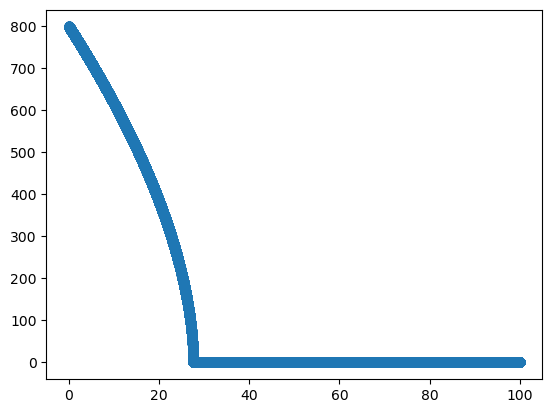

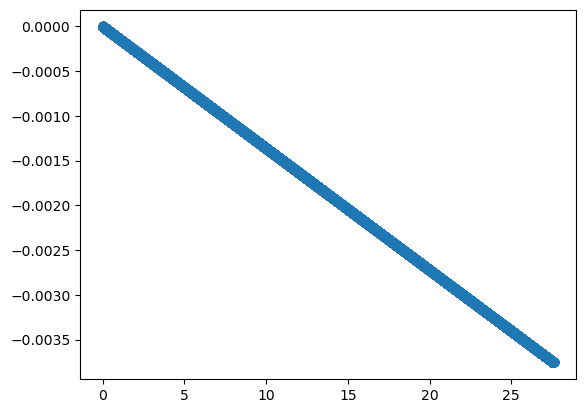

In [3]:
# Q3

f = interp1d(df["Energy"], df["StoppingPower"], kind="cubic", bounds_error=False, fill_value=0)

def S(E):
    return -0.92*f(E)

dose = []
E0 = 800
step_size = 0.0001
num_steps = 1000000

p = 0.92

def euler_method(E0, step_size, num_steps):
    energy = E0
    energy_vert = 0

    r2 = 0
    dose = []
    vertical_energy = []

    for _ in range(num_steps):
        delta = S(energy)
        energy += step_size*delta
        dose.append(energy)

        energy_vert -= step_size*delta*(1/(4*1836))/delta

        vertical_energy.append(energy_vert)

    return dose, r2, vertical_energy

dose_result, r2, vertical_energy = euler_method(E0, step_size, num_steps)
'''plt.scatter(
    step_size* np.arange(0, num_steps),
    dose_result
)
plt.show()

plt.scatter(
    step_size* np.arange(0, num_steps),
    vertical_energy
)'''

Question c

In [5]:
intergral_diffs = integral_diffs/(2*(4*911))

In [5]:
diffs = np.insert(diffs, 0, 0)[:np.argmax(np.diff(dose_result))]
dose_result = np.array(dose_result)[:np.argmax(np.diff(dose_result))]

(2 / (2*4*246453.3135964381)) * np.sum(np.sqrt(dose_result*diffs))

0.3007482812984712

In [124]:
# Q3

f = interp1d(proton_df["Energy"], proton_df["StoppingPower"], kind="cubic", bounds_error=False, fill_value=0)

def S(E):
    return -0.92*f(E)

dose = []
E0 = 200
step_size = 0.0001
num_steps = 1000000

p = 0.92


def euler_method(E0, step_size, num_steps):
    energy = E0

    r2 = 0
    dose = []

    for _ in range(num_steps):
        delta = S(energy)
        energy += step_size*delta
        dose.append(energy)

    return dose, r2

dose_result, r2 = euler_method(E0, step_size, num_steps)

diffs = -np.diff(dose_result)
integral_diffs = diffs[diffs > 0]
diffs = np.insert(diffs, 0, 0)[:274468]
dose_result = np.array(dose_result)[:274468]
diffs = np.insert(diffs, 0, 0)[:274468]
print(f"Constant factor: {2/0.6 * np.sum(np.sqrt(dose_result*diffs))}")

print(f"Half radial spread proton : {(2 / 246453.3135964381) * np.sum(np.sqrt(dose_result*diffs))}")

'''plt.scatter(
    step_size* np.arange(0, num_steps),
    dose_result
)
plt.show()

plt.scatter(
    step_size* np.arange(0, num_steps),
    vertical_energy
)'''

Constant factor: 246450.62963772062
Half radial spread proton : 0.5999934658000454


'plt.scatter(\n    step_size* np.arange(0, num_steps),\n    dose_result\n)\nplt.show()\n\nplt.scatter(\n    step_size* np.arange(0, num_steps),\n    vertical_energy\n)'

In [123]:
f = interp1d(df["Energy"], df["StoppingPower"], kind="cubic", bounds_error=False, fill_value=0)

def S(E):
    return -0.92*f(E)

dose = []
E0 = 800
step_size = 0.0001
num_steps = 1000000

p = 0.92


def euler_method(E0, step_size, num_steps):
    energy = E0

    r2 = 0
    dose = []

    for _ in range(num_steps):
        delta = S(energy)
        energy += step_size*delta
        dose.append(energy)

    return dose, r2

dose_result, r2 = euler_method(E0, step_size, num_steps)

diffs = -np.diff(dose_result)
integral_diffs = diffs[diffs > 0]
diffs = np.insert(diffs, 0, 0)[:274468]
dose_result = np.array(dose_result)[:274468]
diffs = np.insert(diffs, 0, 0)[:274468]

print(f"Half radial spread alpha : {(2 / (2*4*246453.3135964381)) * np.sum(np.sqrt(dose_result*diffs))}")

Half radial spread alpha : 0.2996445529650234


Bethe

In [105]:
# Bethe-Block 
e = 1.6 * 10e-19
E0 = 800 #* 10**6 * e # MeV
S0 = 18.36 * 10**6 * e # MeV cm^2/g
r = 1e-10
epsilon0 = 8.85e-12
Z = 4
v0 = np.sqrt((2*800)/(Z*911))

F = (Z * e**2) / (4*np.pi*epsilon0*r**2)

c = 3e8
m_e = 9.11e-31
N_a = 6.02e23
M_u = 0.9999e-3
z = 4
m0 = 3.73e3 #z * 1.66*10e-27
e = 1.6 * 10e-19
epsilon0 = 8.85e-12

def ev_to_joule(E):
    return E * 1.6e-19

I = ev_to_joule(63.2) 
p = (9.20e-1 * 10e-3 * 10e6) 


def bethe_stopping_power(I, E, p, Z, A, z, m0):
    # z, particle charge
    # Z is atomic charge of the material
    # E in MeV
    
    v = c * np.sqrt(1 - (m0/(E + m0)))
    beta = v/c
    n = (N_a * Z * p)/(A * M_u)
        
    return (4*np.pi)/(m_e * c**2) * (n * z**2/beta**2) * (e**2/(4*np.pi * epsilon0))**2 *(np.log(2*m_e*c**2*beta**2/(I * (1 - beta**2))) - beta**2)

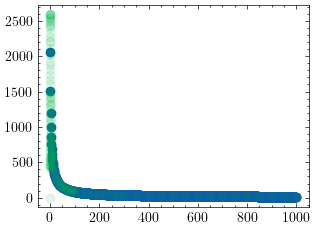

In [106]:
A = 0.114*1 + 0.598*6 + 0.278*14

plt.scatter(
    range(1, 1000, 1),
    np.array([bethe_stopping_power(I = I, E = E, p = p, Z = 6.32, A = A,z = z, m0 = m0)/(1.6e-13 * 10e3 * 10e4) for E in range(1, 1000, 1)])
)

plt.scatter(
    df["Energy"],
    df["StoppingPower"],
    alpha=.1
)